# Agenda

- The Essential Theory behind API Gateways
- A Brief Take on OpenAPI Specifications
- How is AWS API Gateway service helpful in building an API First Approach to Mircroservices?
- Recipe 1: Attaching API Gateway to S3
- Recipe 2: Attaching API Gateway to Lambda which uploads a file to S3 (using `generated presigned url`)
- Recipe 3: Attaching API Gateway to Lambda to query data from a table 
- Ease in securing your API Gateway

# Agenda (new)

- Understanding APIs and HTTP Requests
- What is AWS API Gateway? Why is it important?
- A Practical Approach to Learn and Implement API Gateway - Attach an API Gateway to an S3 Bucket (Recipe 1)
(refer to the README.md here - /Users/senthilkumar.m/Library/CloudStorage/OneDrive-TOYOTAConnectedIndia/Learnings/aws_serverless_recipes/api_gateway/s3_integration_for_file_uploads/README.md)
- The OpenAPI Route to Creating and Implementing AWS API Gateways
    - The basics of OpenAPI 
    - Recipe 2: `Attaching API Gateway to Lambda to query data from a table`

- The API-first approach to Software Development

# The Essential Theory behind API Gateways

## Understanding APIs - The Precursor Knowledge to API Gateways

### 1. What is a Front-End (client-side) and a Back-End (server-side) of a Web Application?

(pic to be re-drawn )
![](https://assets.isu.pub/document-structure/230420045915-3626970f5fe74851ad203b0d481b651b/v1/a5322253bcb34d6e0e64c3160e21f0a0.jpeg)
Source: [Backend for Frontend Architecture - The key to building scalable and maintenable Frontend Applications](https://issuu.com/mobileliveca/docs/backend_for_frontend_application_architecture_the_)

#ToDo #ToReWrite
```
1.Client-Side: ==The client-side refers to the part of a web application that runs in the user’s browser.==


2.Server-Side: ==While the client side focuses on the user experience and presentation, the server side handles behind-the-scenes processing and data management==.

3.Databases: Web applications often require persistent data storage, and databases serve as a reliable solution. Server-side scripts communicate with databases to store and retrieve information, ensuring the persistence and accessibility of data across multiple sessions. Popular database management systems include MySQL, PostgreSQL, MongoDB, and SQLite.


Client-side and server-side components interact through a client-server communication model (`HTTP Requests`. When a user interacts with a web page, the client-side technologies handle the user input and perform initial validations. Then, the client-side sends requests to the server-side for more complex operations, such as database access or external API calls. The server-side processes these requests, performs the necessary computations, retrieves data, and generates a response. This response is then sent back to the client-side, where it is rendered and presented to the user.
```
Source: Direct Copy-paste from https://medium.com/@destinyonuiri/understanding-the-differences-between-client-side-and-server-side-in-web-development-99f8e41bcfb3


### 2. What is an API? 

![](https://planningpokerweb.com/wp-content/uploads/2023/08/What-is-an-API-non-tech-people.png)
Source: [APIs: The unseen bridge in digital products for non-tech people](https://planningpokerweb.com/product-management/apis-the-unseen-bridge-in-digital-products-for-non-tech-people/)


### 2. What are `HTTP Requests`?

#ToDo #ToReWrite 

Answer from ChatGPT: 

> HTTP (Hypertext Transfer Protocol) requests are **messages** sent by a client (such as a web browser, mobile app, or another server) to a server, typically to request or send data. These requests are fundamental to how the World Wide Web operates and are **the basis for communication between clients and servers**.



```
What are the Components of a HTTP request? 
1. Request Method
	1. GET (Retrieve a resource from the server)
	2. POST: Send data to the server (CREATE or UPDATE a resource) - for non-dempotent tasks (repeated identical tasks have different effects)
	3. PUT: Update a resource on the server (for idempotent tasks - repeated identical tasks should have the same effect); PUT request multiple times will have the same outcome as making it once, with no side effects
	4. DELETE: Delete a resource

> For example, if you are updating or replacing the details of a user account, changing the content of a blog post, or modifying the properties of a product in an e-commerce store, PUT would be the appropriate method. However, if you are creating a new resource on the server, such as a new user account, blog post, or product, POST would be the appropriate method.


2. Uniform Resource Identifier
	1. Could be a URL - Uniform Resource Allocator (that has `http` or `https` protocol, domain name and path)
3. HTTP Version
4. Headers (provided additional info about the request or the client making the request)
	1. Content Type 
	2. Accept Type
	3. Authentication Tokens (Authorization)
	4. Cookies
	5. Origin
	6. Cache-control
5. Body
```

Is there any other URI other than URLs? Can you give examples?
- Apart from URL, there are URNs, Data URIs (used to represent images directly within the HTML or CSS files)

---


### 3. What is QueryString Parameters in the context of a HTTP request? Where is it used? Is it part of header?

In https://example.com/search?q=term&page=1, `q`  and `page` are query string parameters or query parameters


Query Parameters are used by API requests to have control over the data requested from the server

`Query parameters are not part of the HTTP request header`

---

### 4. What is the difference between a HTTP API Request and a REST API request?


```
1. HTTP APIs are a type of API that use the HTTP protocol for communication between clients and servers.
2. HTTP APIs can encompass a wide range of API designs and architectures, including both **RESTful and non-RESTful approaches**.
```


```
1. RESTful APIs use standardized resource URIs and follow principles such as **statelessness**, meaning that each request from a client must contain all the information necessary to process the request, and servers don't maintain any client state between requests.
2. RESTful APIs adhere to a set of architectural constraints defined by Roy Fielding in his doctoral dissertation, including client-server architecture, statelessness, cacheability, uniform interface, layered system, and code on demand (optional).
```


Real-time Communication: In some cases, non-RESTful APIs are used for real-time communication scenarios where RESTful APIs may not be well-suited. For example, WebSocket APIs enable bidirectional communication between clients and servers in real-time applications like chat applications or online gaming.

---

### 5. What are the different types of applications possible to be sent in the Body of a HTTP request? 

- TextData, 
- Binary Data
- XML
- JSON
- HTML

---

### 6. Is there a HTTPS request? 

Yes, HTTPS requests are HTTP request encrypted with SSL/TLS (Secure Sockets Layer/ Transport Layer Security) protocols 


---

We use HTTPS APIs when creating using API Gateways

  
In AWS API Gateway, the default behavior is to create HTTPS APIs. However, you can specify the protocol when creating an API using the AWS CLI by providing the `--protocol-type`

``
```
aws apigateway create-rest-api --name MyApi --protocol-type HTTP
```


## What is AG?

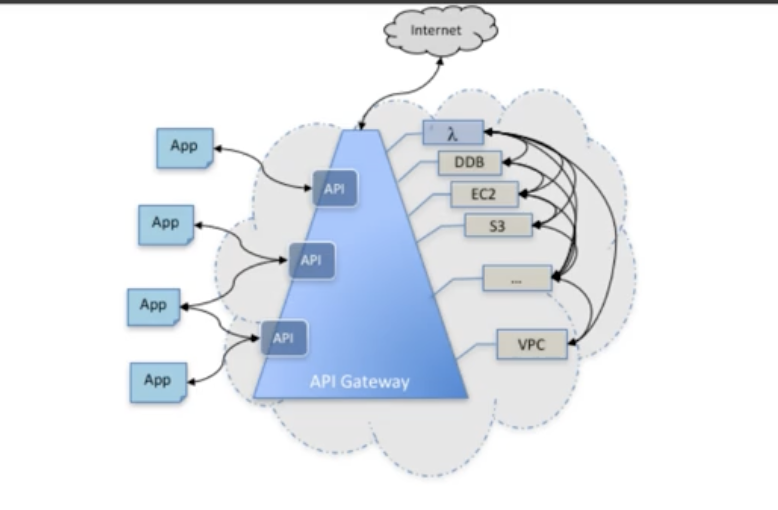

> API Gateway is a AWS  acts a middle man (or like a door) between Client (mobile apps or Web browsers) that is making a request and the Server (the backend service like Lambda, EC2 instance, etc.,) that gives a response back. 



### Where is the AG used? <br> [#TODO]
- AG is used
    - in Serverless Applications (I have attached API Gateways to AWS Lambdas and those REST APIs get used in a  Frontend)
    - in Legacy Applications 
    
----

### Different Parts of AG

- 0. (Optional) Authorizer Piece
- 1. Request Flow (**everything that happens before the request from client hits the backend service**)
    - a. Method Request  
    - b. Integration Request
    
- 2. Integration 
- 3. Response Flow (everything that happens from the resonse of backend service to when it is received by the client)

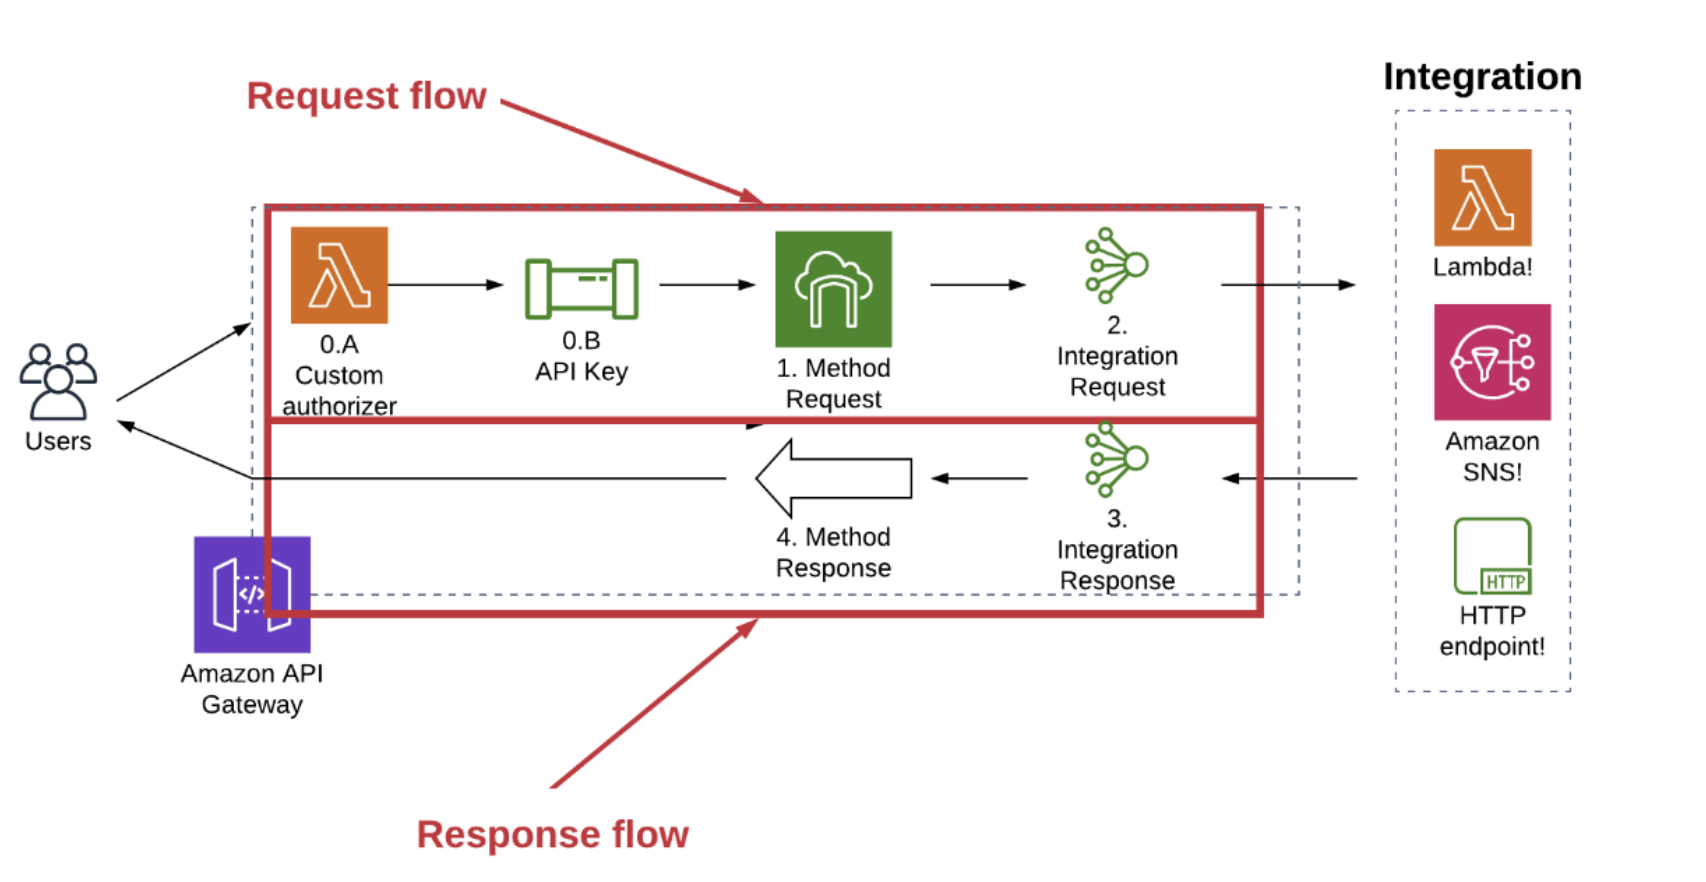

[source](https://prafulla-alok.medium.com/quick-notes-amazon-api-gateway-b5dafc960841)
[source2](alexdebrie.com/posts/api-gateway-elements/)

#### Request Flow - a. Method Request

`method request` or the public interface of an API method in API gateway defines the `parameters` and `body` that an app developer must send in the requests to access the backend through the API

In `Method Request`, we validate  the following parameters of the HTTP API request



- QueryStrings
- Headers
    - Authorization
- Payloads


#### Request Flow - c. Method Response

In `Method Response` 
we define the status codes, headers and body models that an app developer should expect from API Gateway. 

### Types of APIs in API Gateway

apigateway vs apigatewayv2
(source: https://www.pulumi.com/ai/answers/wc35D5ECVuvUu7xE6h5SxM/comparing-aws-api-gateway-and-api-gateway-v2)


## HTTP API

HTTP APIs are the best choice for building APIs that only require API proxy functionality.

## REST API

Restful APIs for require API proxy functionality and API management features.

## Websocket API

Websocket API for building real-time two-way communication applications, such as chat apps and streaming dashboards.

### A brief take on OpenAPI in API Gateways: 

```
So the API Gateway has a tight integration

with the OpenAPI specification.

So what is the OpenAPI specification?

Well, it's a very common way to define REST APIs

and the API definition itself is code.

So what you can do is that you create

this specification using the OpenAPI model 3.0

and then you import that into the API gateway.
```
- Source: Udemy AWS Developer Associate course

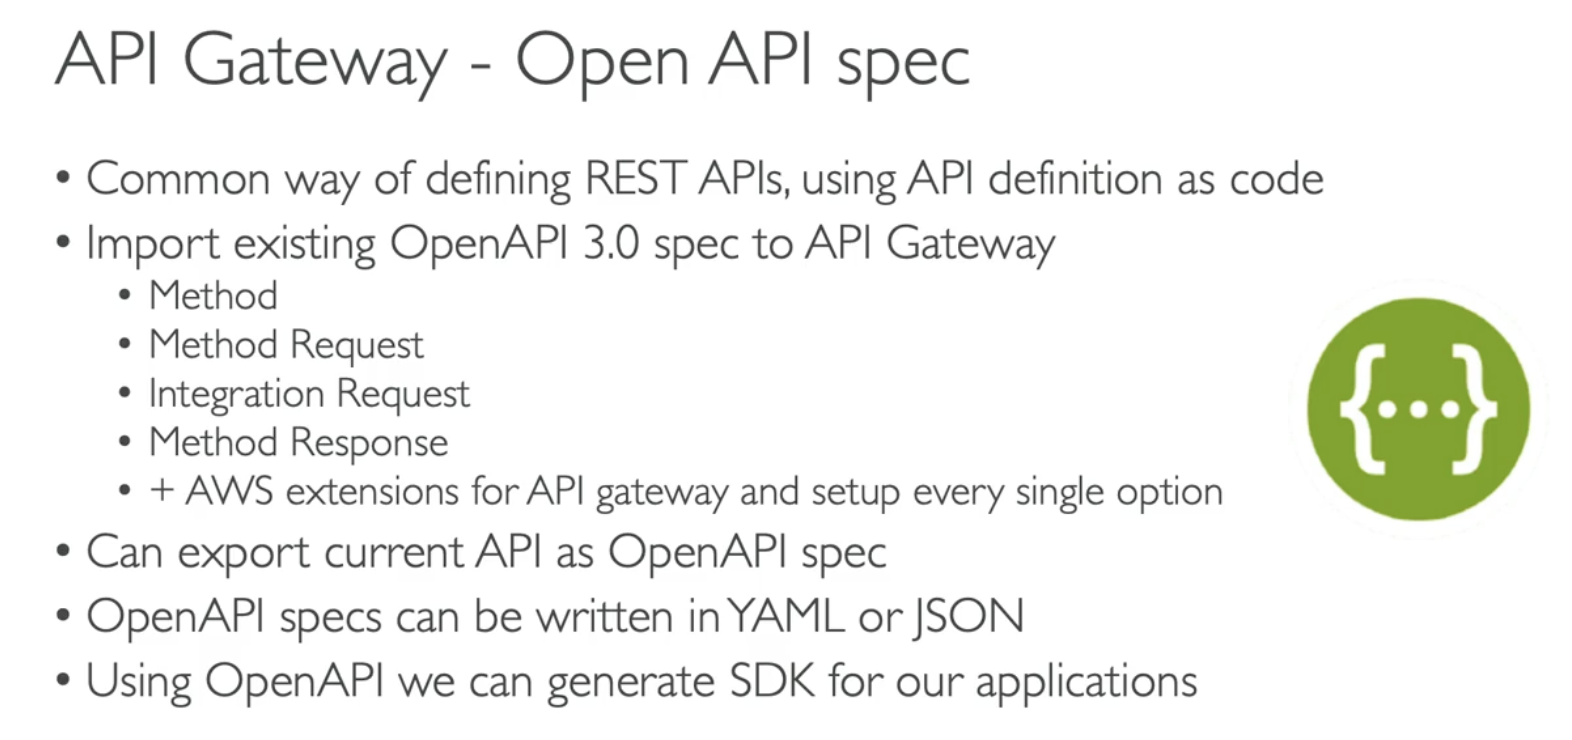

### Recipes

1. A Rest API endpoint to upload an object to S3 (directly). Max limit is 10 MB [medium blog on apigateay s3](https://sayed-imran.medium.com/aws-api-gateway-and-s3-integration-encouraging-the-correct-way-61b180c938a7)
2. A Rest API endpoint attached to a lambda that generates a pre-signed url. Max limit is 5 TB per file object (S3's file size limit)
3. A Res

Sources of this blog:


- 1. Quick Notes | [link](https://prafulla-alok.medium.com/quick-notes-amazon-api-gateway-b5dafc960841)
- 2. Main Features and Core Concepts | [link](https://medium.com/aws-lambda-serverless-developer-guide-with-hands/amazon-api-gateway-main-features-and-core-concepts-980e8cadef09)
- 3. Definition of API Gateway AND Creating REST API with API Gateway | [link](https://cmakkaya.medium.com/what-is-an-api-and-the-amazon-api-gateway-creating-and-using-a-rest-api-with-amazon-api-gateway-d1b42cbb1037)
- 4. Effortless API Management | [link](https://medium.com/cloud-native-daily/amazon-api-gateway-effortless-api-management-2bfa6e50f5ac)
- 5. Why API Gateway is one of the best AWS Services | [link](https://pmc-a.medium.com/why-api-gateway-is-one-of-the-best-aws-services-eda44e736f2c)

- 6. AWS API Gateway Interview Questions and Answers in 2024 https://mindmajix.com/aws-api-gateway-interview-questions
- 7. Using AWS WAF to protect your APIs - Amazon API Gateway https://docs.aws.amazon.com/apigateway/latest/developerguide/apigateway-control-access-aws-waf.html
- 8. Amazon API Gateway | AWS Cheat Sheet - Digital Cloud Training https://digitalcloud.training/amazon-api-gateway/
- 9. aws api gateway & lambda: multiple endpoint/functions vs single endpoint https://stackoverflow.com/questions/41425511/aws-api-gateway-lambda-multiple-endpoint-functions-vs-single-endpoint
- 10. AWS Storage Gateway FAQs | Amazon Web Services https://aws.amazon.com/storagegateway/faqs/

what are the benefits of attaching api gateway to aws services

Here are some key benefits of attaching Amazon API Gateway to AWS services:

- **Enables creating and deploying REST and WebSocket APIs** that expose AWS Lambda functions, Amazon EC2 services, or other AWS services as HTTP endpoints[1][3].

- **Provides a single entry point for clients** to access multiple microservices or AWS resources[1]. This facilitates traffic management, monitoring, authentication and security for the APIs.

- **Supports multiple AWS services as backend integrations** including Lambda, Amazon EC2, Amazon S3, Amazon DynamoDB, Amazon Kinesis, Amazon SNS, Amazon SQS, and more[1][2]. This allows building APIs on top of various AWS services.

- **Offers features like caching, throttling, monitoring, versioning, and canary deployments** to manage and optimize API usage[3]. This helps ensure API performance and availability.

- **Provides security features** like IAM policies, Lambda authorizers, Amazon Cognito user pools, and AWS WAF integration to control and secure access to your APIs[2][3].

- **Enables defining usage plans and API keys** to meter and restrict access to your APIs[3]. This allows monetizing APIs.

- **Simplifies API development** by handling tasks like traffic management, authorization, access control, monitoring, and API version management[3].

So in summary, API Gateway makes it easy to create, deploy, secure, monitor and scale APIs that access various AWS services, without managing any servers. It provides a comprehensive API management platform on top of AWS.


Source: Question to Perplexity AI